## **GEMSTONE CLASSIFIER AND PRICES PREDICTOR**
### **INTELIGENCIA ARTIFICIAL I - GRUPO H2**
 **Rubi Tatiana Utima Echeverry - 2190032** \
 **Andres Felipe Valenzuela Pardo - 2190035**


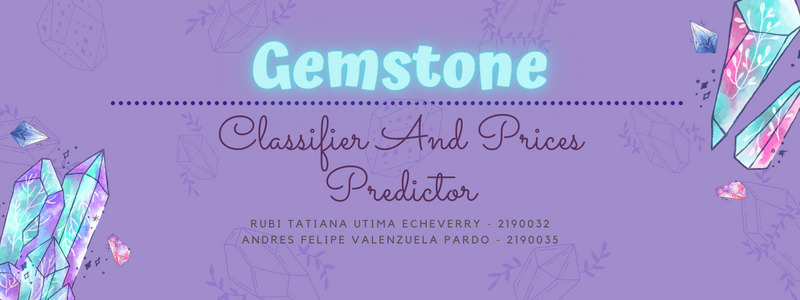

In [7]:
from IPython.display import Image 
Image(r"C:\Users\ADMIN\Documents\Proyecto IA\Gemstone.jpeg")

### LINK VIDEO
https://www.youtube.com/watch?v=502W_Vtg5pE&feature=youtu.be

### LINK DATASET
https://www.kaggle.com/datasets/lsind18/gemstones-images

### **IMPORTACION DE LIBRERIAS**

In [1]:
import os
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io
import cv2
from random import randint
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

### **IMPORTACION DEL DATASET**


Se guardan las rutas de las carpetas con imagenes.

In [2]:
gems_train = r"C:\Users\ADMIN\Documents\Proyecto IA\Gemstone_dataset\train"
gems_test = r"C:\Users\ADMIN\Documents\Proyecto IA\Gemstone_dataset\test"

In [64]:
classes, gems = [], [] # nombres de las clases

for root, dirs, files in os.walk(gems_train):
    f = os.path.basename(root)    # get class name - Amethyst, Onyx, etc    
    if len(files) > 0:
        gems.append(len(files))
        if f not in classes:
            classes.append(f) 
            
print(classes)

['Alexandrite', 'Almandine', 'Amazonite', 'Amber', 'Amethyst', 'Ametrine', 'Andalusite', 'Andradite', 'Aquamarine', 'Aventurine Green', 'Aventurine Yellow', 'Benitoite', 'Beryl Golden', 'Bixbite', 'Bloodstone', 'Blue Lace Agate', 'Carnelian', 'Cats Eye', 'Chalcedony', 'Chalcedony Blue', 'Chrome Diopside', 'Chrysoberyl', 'Chrysocolla', 'Chrysoprase', 'Citrine', 'Coral', 'Danburite', 'Diamond', 'Diaspore', 'Dumortierite', 'Emerald', 'Fluorite', 'Garnet Red', 'Goshenite', 'Grossular', 'Hessonite', 'Hiddenite', 'Iolite', 'Jade', 'Jasper', 'Kunzite', 'Kyanite', 'Labradorite', 'Lapis Lazuli', 'Larimar', 'Malachite', 'Moonstone', 'Morganite', 'Onyx Black', 'Onyx Green', 'Onyx Red', 'Opal', 'Pearl', 'Peridot', 'Prehnite', 'Pyrite', 'Pyrope', 'Quartz Beer', 'Quartz Lemon', 'Quartz Rose', 'Quartz Rutilated', 'Quartz Smoky', 'Rhodochrosite', 'Rhodolite', 'Rhodonite', 'Ruby', 'Sapphire Blue', 'Sapphire Pink', 'Sapphire Purple', 'Sapphire Yellow', 'Scapolite', 'Serpentine', 'Sodalite', 'Spessartite

Funcion que retorna una lista con las imagenes y las etiquetas (nombres de las clases) del dataset.

In [4]:
def read_imgs_lbls(_dir):
    img_w, img_h = 220, 220
    Images, Labels = [], []
    for root, dirs, files in os.walk(_dir):
        f = os.path.basename(root)                                              #Se obtiene el nombre de la clase - Amethyst, Onyx, Emerald, Jade , etc       
        for file in files:
            Labels.append(f)
            try:
                image = cv2.imread(root+'/'+file)                               #Lee la imagen (OpenCV)
                image = cv2.resize(image,(int(img_w*1.5), int(img_h*1.5)))      #Redimensiona la imagen 
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)                  #Pasa la imagen de from BGR a RGB
                Images.append(image.flatten())                                  #Se "comprimen" las dimensiones en un vector
            except Exception as e:
                print(e)
    Images = np.array(Images)                                                   #La lista se convierte en array
    return (Images, Labels)

Funcion que convierte los valores de las etiquetas de Strings a Integers.

In [5]:
def get_class_index(Labels):
    for i, n in enumerate(Labels):
        for j, k in enumerate(classes):
            if n == k:
                Labels[i] = j
    Labels = np.array(Labels)        #Los valores numericos se guardan en un array, esto facilitará los calculos
    return Labels

Se inicializa la data de entrenamiento.

In [6]:
Train_Imgs, Train_Lbls = read_imgs_lbls(gems_train)     #Se capturan las imagenes y etiquetas de entrenamiento
Train_Lbls = get_class_index(Train_Lbls)                #Se convierten las etiquetas a su representacion entera

Train_Imgs = np.array(Train_Imgs).astype(np.float32)    #Se formatea la informacion de las imagenes para evitar errores 
Train_Lbls = np.array(Train_Lbls).astype(np.int32)      #Se formatea la informacion de las etiquetas para evitar errores 
Train_Imgs = Train_Imgs/255                             #Esta operacion permite tener los valores RGB entre 0 y 1

Imgs_show = Train_Imgs.reshape(Train_Imgs.shape[0],330,330,3)    #Se restuara la informacion a las dimensiones originales
print(Train_Imgs.shape)

(2856, 326700)


La data de "Training" se divide a su vez en 80% entrenamiento, 20% test, esto con el fin de realizar las diferentes pruebas de modelos con esta informacion. Por otro lado, la data de "Test" se utilizará unicamente con el modelo que obtenga los mejores resultados en esta fase de seleccion.

In [7]:
##Permutacion para clasificadores
from sklearn.model_selection import train_test_split
p = np.random.permutation(range(len(Train_Imgs)))
Train_Imgs = Train_Imgs[p]                               #Se mezclan las imagenes
Train_Lbls = Train_Lbls[p]                               #Se mezclan las etiquetas
X_train, X_test, y_train, y_test = train_test_split(Train_Imgs, Train_Lbls, test_size = 0.2, random_state = 111)

(2284, 326700)
(572, 326700)
(2284,)
(572,)


## Muestra de imagenes
A continuacion se presenta una muestra de las imagenes del dataset.

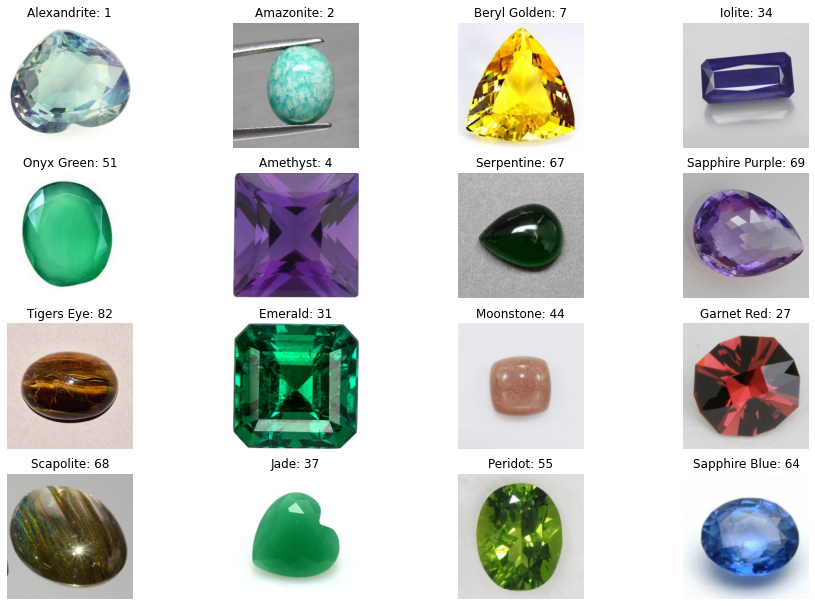

In [ ]:
dim = 4 #Dimensiones de las imgs
f,ax = plt.subplots(dim,dim) 
f.subplots_adjust(0,0,2,2)
for i in range(0,dim):
    for j in range(0,dim):
        rnd_number = randint(0,len(Train_Imgs))
        cl = Train_Lbls[rnd_number]
        ax[i,j].imshow(Imgs_show[rnd_number])
        ax[i,j].set_title(classes[cl]+': ' + str(cl))
        ax[i,j].axis('off')
















----------------------------
















----------------------------

## **CREACION DE RED Y PRUEBAS CON CNN**

In [8]:
##Permutacion para Clasificacion con CNN
from sklearn.model_selection import train_test_split
p = np.random.permutation(range(len(Imgs_show)))
Train_Imgs_CNN = Imgs_show[p]
Train_Lbls_CNN = Train_Lbls[p]
X_train_cnn, X_test_cnn, y_train_cnn, y_test_cnn = train_test_split(Train_Imgs_CNN, Train_Lbls, test_size = 0.2, random_state = 111)

In [9]:
#One hot encoding
y_train_cnn = tf.keras.utils.to_categorical(y_train_cnn)
y_test_cnn = tf.keras.utils.to_categorical(y_test_cnn)

(2284, 87)
(572, 87)


In [10]:
print('x_train shape:', X_train_cnn.shape)
print('Numero de imagenes en x_train', X_train_cnn.shape[0], "y_train:", y_train_cnn.shape)
print('Numero de imagenes in x_test', X_test_cnn.shape[0], "y_test: ", y_test_cnn.shape)

x_train shape: (2284, 330, 330, 3)
Numero de imagenes en x_train 2284 y_train: (2284, 87)
Numero de imagenes in x_test 572 y_test:  (572, 87)


## Modelo 1

------------------------------------------------------------------------

In [51]:
#CNN model 1
gems_model1 =  tf.keras.models.Sequential()
gems_model1.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(330, 330, 3)))
gems_model1.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
gems_model1.add(tf.keras.layers.MaxPooling2D((2, 2)))
gems_model1.add(tf.keras.layers.Flatten())
gems_model1.add(tf.keras.layers.Dense(64, activation='relu'))
gems_model1.add(tf.keras.layers.Dense(87, activation='softmax'))

gems_model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 330, 330, 32)      896       
                                                                 
 conv2d_3 (Conv2D)           (None, 330, 330, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 165, 165, 32)     0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 871200)            0         
                                                                 
 dense_2 (Dense)             (None, 64)                55756864  
                                                                 
 dense_3 (Dense)             (None, 87)                5655      
                                                      

In [52]:
gems_model1.compile(optimizer=tf.keras.optimizers.SGD(), 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [53]:
hist1 = gems_model1.fit(X_train_cnn,y_train_cnn, batch_size = 64, epochs=40, verbose=1, shuffle=True,
          validation_data=(X_test_cnn, y_test_cnn))

Epoch 1/40
36/36 [==============================] - 247s 7s/step - loss: 4.4755 - accuracy: 0.0101 - val_loss: 4.4660 - val_accuracy: 0.0105
Epoch 2/40
36/36 [==============================] - 247s 7s/step - loss: 4.4659 - accuracy: 0.0149 - val_loss: 4.4660 - val_accuracy: 0.0087
Epoch 3/40
36/36 [==============================] - 236s 7s/step - loss: 4.4655 - accuracy: 0.0180 - val_loss: 4.4741 - val_accuracy: 0.0087
Epoch 4/40
36/36 [==============================] - 236s 7s/step - loss: 4.4665 - accuracy: 0.0158 - val_loss: 4.4662 - val_accuracy: 0.0122
Epoch 5/40
36/36 [==============================] - 235s 7s/step - loss: 4.4652 - accuracy: 0.0175 - val_loss: 4.4660 - val_accuracy: 0.0105
Epoch 6/40
36/36 [==============================] - 235s 7s/step - loss: 4.4663 - accuracy: 0.0166 - val_loss: 4.4661 - val_accuracy: 0.0105
Epoch 7/40
36/36 [==============================] - 236s 7s/step - loss: 4.4645 - accuracy: 0.0158 - val_loss: 4.4662 - val_accuracy: 0.0122
Epoch 8/40
36

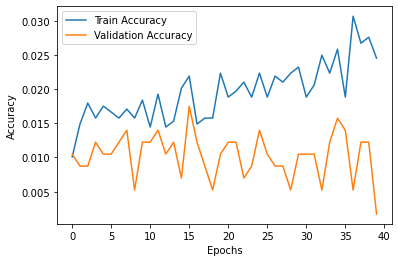

In [55]:
plt.plot(hist1.history['accuracy'], label='Train Accuracy')
plt.plot(hist1.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

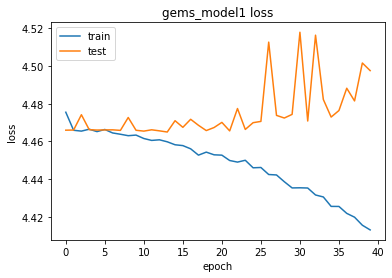

In [56]:
plt.plot(hist1.history['loss'])  
plt.plot(hist1.history['val_loss'])  
plt.title('gems_model1 loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')
plt.show()
















----------------------------

## Modelo 2

In [57]:
#CNN model 2
gems_model2 =  tf.keras.models.Sequential()
gems_model2.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(330, 330, 3)))
gems_model2.add(tf.keras.layers.MaxPooling2D((2, 2)))
gems_model2.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
gems_model2.add(tf.keras.layers.MaxPooling2D((2, 2)))
gems_model2.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
gems_model2.add(tf.keras.layers.MaxPooling2D((2, 2)))
gems_model2.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
gems_model2.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
gems_model2.add(tf.keras.layers.MaxPooling2D((2, 2)))
gems_model2.add(tf.keras.layers.Flatten())
gems_model2.add(tf.keras.layers.Dropout(0.5))
gems_model2.add(tf.keras.layers.Dense(512, activation='relu'))
gems_model2.add(tf.keras.layers.Dense(87, activation='softmax'))
gems_model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 328, 328, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 164, 164, 32)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 162, 162, 64)      18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 81, 81, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 79, 79, 128)       73856     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 39, 39, 128)     

In [58]:
gems_model2.compile(optimizer=tf.keras.optimizers.SGD(), 
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [59]:
hist2 = gems_model2.fit(X_train_cnn,y_train_cnn, batch_size = 64, epochs=40, verbose=1, shuffle=True,
          validation_data=(X_test_cnn, y_test_cnn))

Epoch 1/40
36/36 [==============================] - 195s 5s/step - loss: 0.6394 - accuracy: 0.0096 - val_loss: 0.4769 - val_accuracy: 0.0140
Epoch 2/40
36/36 [==============================] - 184s 5s/step - loss: 0.2005 - accuracy: 0.0131 - val_loss: 0.0738 - val_accuracy: 0.0122
Epoch 3/40
36/36 [==============================] - 182s 5s/step - loss: 0.0762 - accuracy: 0.0105 - val_loss: 0.0704 - val_accuracy: 0.0157
Epoch 4/40
36/36 [==============================] - 183s 5s/step - loss: 0.0738 - accuracy: 0.0131 - val_loss: 0.0694 - val_accuracy: 0.0105
Epoch 5/40
36/36 [==============================] - 184s 5s/step - loss: 0.0724 - accuracy: 0.0140 - val_loss: 0.0690 - val_accuracy: 0.0140
Epoch 6/40
36/36 [==============================] - 185s 5s/step - loss: 0.0722 - accuracy: 0.0101 - val_loss: 0.0686 - val_accuracy: 0.0122
Epoch 7/40
36/36 [==============================] - 181s 5s/step - loss: 0.0713 - accuracy: 0.0166 - val_loss: 0.0684 - val_accuracy: 0.0122
Epoch 8/40
36

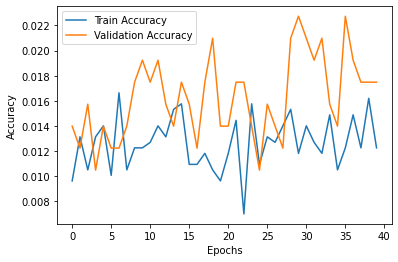

In [60]:
plt.plot(hist2.history['accuracy'], label='Train Accuracy')
plt.plot(hist2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

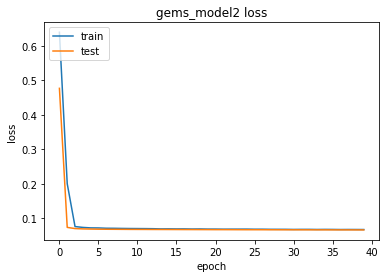

In [61]:
plt.plot(hist2.history['loss'])  
plt.plot(hist2.history['val_loss'])  
plt.title('gems_model2 loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')
plt.show()
















----------------------------

## Modelo 3

In [62]:
#CNN model 3
gems_model3 =  tf.keras.models.Sequential()
gems_model3.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(330, 330, 3)))
gems_model3.add(tf.keras.layers.MaxPooling2D((2, 2)))
gems_model3.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
gems_model3.add(tf.keras.layers.MaxPooling2D(2,2))
gems_model3.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
gems_model3.add(tf.keras.layers.MaxPooling2D((2, 2)))
gems_model3.add(tf.keras.layers.Dropout(0.4))
gems_model3.add(tf.keras.layers.Flatten())
gems_model3.add(tf.keras.layers.Dense(512, activation='relu'))
gems_model3.add(tf.keras.layers.Dense(87, activation='softmax'))
gems_model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 328, 328, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 164, 164, 32)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 162, 162, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 81, 81, 64)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 79, 79, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 39, 39, 128)     

In [63]:
gems_model3.compile(optimizer=tf.keras.optimizers.SGD(), 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [64]:
hist3 = gems_model3.fit(X_train_cnn,y_train_cnn, batch_size = 64, epochs=40, verbose=1, shuffle=True,
          validation_data=(X_test_cnn, y_test_cnn))


test_loss, test_acc = gems_model3.evaluate(X_train_cnn, y_train_cnn)
print('Test accuracy:', test_acc)

Epoch 1/40
36/36 [==============================] - 176s 5s/step - loss: 4.4762 - accuracy: 0.0123 - val_loss: 4.4693 - val_accuracy: 0.0105
Epoch 2/40
36/36 [==============================] - 173s 5s/step - loss: 4.4649 - accuracy: 0.0136 - val_loss: 4.4709 - val_accuracy: 0.0105
Epoch 3/40
36/36 [==============================] - 173s 5s/step - loss: 4.4617 - accuracy: 0.0158 - val_loss: 4.4734 - val_accuracy: 0.0105
Epoch 4/40
36/36 [==============================] - 173s 5s/step - loss: 4.4593 - accuracy: 0.0158 - val_loss: 4.4760 - val_accuracy: 0.0105
Epoch 5/40
36/36 [==============================] - 174s 5s/step - loss: 4.4563 - accuracy: 0.0166 - val_loss: 4.4761 - val_accuracy: 0.0105
Epoch 6/40
36/36 [==============================] - 174s 5s/step - loss: 4.4535 - accuracy: 0.0184 - val_loss: 4.4776 - val_accuracy: 0.0105
Epoch 7/40
36/36 [==============================] - 174s 5s/step - loss: 4.4514 - accuracy: 0.0166 - val_loss: 4.4767 - val_accuracy: 0.0105
Epoch 8/40
36

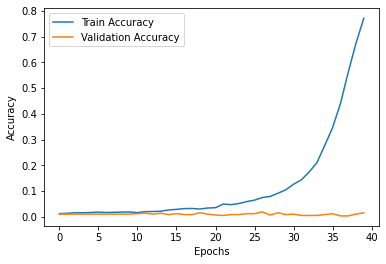

In [65]:
plt.plot(hist3.history['accuracy'], label='Train Accuracy')
plt.plot(hist3.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

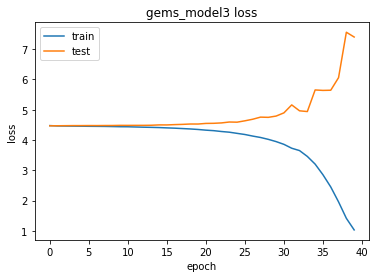

In [66]:
plt.plot(hist3.history['loss'])  
plt.plot(hist3.history['val_loss'])  
plt.title('gems_model3 loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')
plt.show()
















----------------------------

## Modelo 4

In [70]:
#CNN model 4
gems_model4 =  tf.keras.models.Sequential()
gems_model4.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(330, 330, 3)))
gems_model4.add(tf.keras.layers.MaxPooling2D((2, 2)))
gems_model4.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
gems_model4.add(tf.keras.layers.MaxPooling2D(2,2))
gems_model4.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
gems_model4.add(tf.keras.layers.MaxPooling2D((2, 2)))
gems_model4.add(tf.keras.layers.Flatten())
gems_model4.add(tf.keras.layers.Dropout(0.8))
gems_model4.add(tf.keras.layers.Dense(512, activation='relu'))
gems_model4.add(tf.keras.layers.Dense(87, activation='softmax'))
gems_model4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 328, 328, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 164, 164, 32)     0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 162, 162, 64)      18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 81, 81, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 79, 79, 128)       73856     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 39, 39, 128)     

In [72]:
gems_model4.compile(optimizer=tf.keras.optimizers.SGD(), 
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [74]:
hist4 = gems_model4.fit(X_train_cnn,y_train_cnn, batch_size = 32, epochs=50, verbose=1, shuffle=True,
          validation_data=(X_test_cnn, y_test_cnn))

Epoch 1/50
72/72 [==============================] - 191s 3s/step - loss: 0.0736 - accuracy: 0.0105 - val_loss: 0.0703 - val_accuracy: 0.0175
Epoch 2/50
72/72 [==============================] - 188s 3s/step - loss: 0.0723 - accuracy: 0.0118 - val_loss: 0.0695 - val_accuracy: 0.0140
Epoch 3/50
72/72 [==============================] - 202s 3s/step - loss: 0.0718 - accuracy: 0.0158 - val_loss: 0.0691 - val_accuracy: 0.0140
Epoch 4/50
72/72 [==============================] - 190s 3s/step - loss: 0.0708 - accuracy: 0.0123 - val_loss: 0.0687 - val_accuracy: 0.0140
Epoch 5/50
72/72 [==============================] - 190s 3s/step - loss: 0.0707 - accuracy: 0.0123 - val_loss: 0.0684 - val_accuracy: 0.0140
Epoch 6/50
72/72 [==============================] - 188s 3s/step - loss: 0.0702 - accuracy: 0.0118 - val_loss: 0.0681 - val_accuracy: 0.0122
Epoch 7/50
72/72 [==============================] - 188s 3s/step - loss: 0.0698 - accuracy: 0.0105 - val_loss: 0.0679 - val_accuracy: 0.0122
Epoch 8/50
72

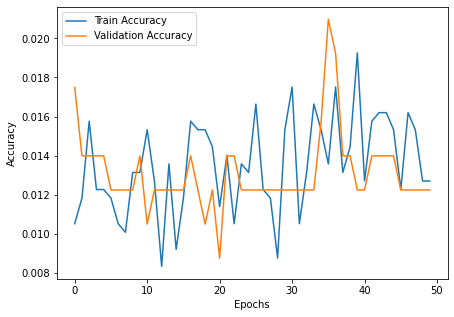

In [75]:
plt.plot(hist4.history['accuracy'], label='Train Accuracy')
plt.plot(hist4.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

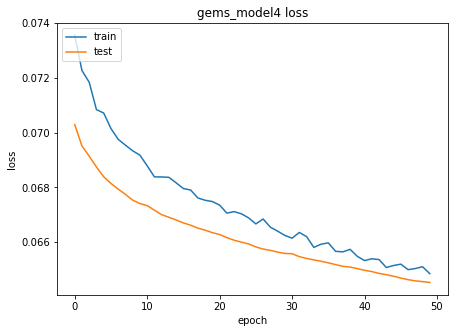

In [76]:
plt.plot(hist4.history['loss'])  
plt.plot(hist4.history['val_loss'])  
plt.title('gems_model4 loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')
plt.show()
















----------------------------

## Modelo 5

In [105]:
#CNN model 5
gems_model5 =  tf.keras.models.Sequential()
gems_model5.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(330, 330, 3)))
gems_model5.add(tf.keras.layers.MaxPooling2D((2, 2)))
gems_model5.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
gems_model5.add(tf.keras.layers.MaxPooling2D(2,2))
gems_model5.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
gems_model5.add(tf.keras.layers.MaxPooling2D((2, 2)))
gems_model5.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
gems_model5.add(tf.keras.layers.MaxPooling2D((2, 2)))
gems_model5.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
gems_model5.add(tf.keras.layers.MaxPooling2D((2, 2)))
gems_model5.add(tf.keras.layers.Flatten())
gems_model5.add(tf.keras.layers.Dropout(0.5))
gems_model5.add(tf.keras.layers.Dense(512, activation='relu'))
gems_model5.add(tf.keras.layers.Dense(87, activation='softmax'))
gems_model5.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 328, 328, 32)      896       
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 164, 164, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 162, 162, 64)      18496     
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 81, 81, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_24 (Conv2D)          (None, 79, 79, 128)       73856     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 39, 39, 128)     

In [108]:
gems_model5.compile(optimizer="adam", 
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
hist5 = gems_model5.fit(X_train_t,y_train_t, batch_size = 32, epochs=40, verbose=1, shuffle=True,
          validation_data=(X_test_t, y_test_t))

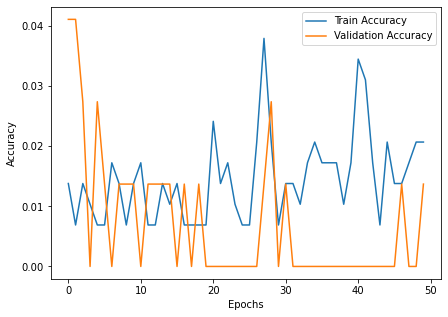

In [103]:
plt.plot(hist5.history['accuracy'], label='Train Accuracy')
plt.plot(hist5.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

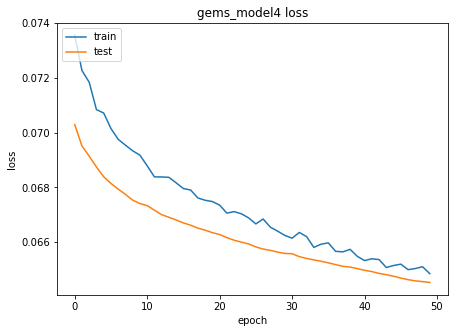

In [104]:
plt.plot(hist4.history['loss'])  
plt.plot(hist4.history['val_loss'])  
plt.title('gems_model4 loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Clasificacion con RandomForest y SVC

### Random Forest Classifier
Para probar el desempeño en la clasificacion de gemas utilizando este metodo, se implementa una funcion, la cual va a iterar la profundidad del RF, este valor iterará entre 1 y 31. 

In [68]:
def rfClassifierResults(imgs, labels):
    import numpy as np
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.metrics import accuracy_score
    from sklearn.model_selection import KFold
    from sklearn.model_selection import cross_val_score
    from sklearn.metrics import make_scorer
    avg , std =[],[]
    
    for i in range(1, 31, 1):
      est = RandomForestClassifier(max_depth=i, n_estimators=9, random_state=21) 
      s = cross_val_score(est, imgs, labels, cv=KFold(10, shuffle=False), scoring=make_scorer(accuracy_score))
      avg.append(np.mean(s))
      std.append(np.std(s))

    return avg, std

Se utilizará la funcion previamente declarada y se ilustrará el desempeño del RF en cada iteracion realizada.

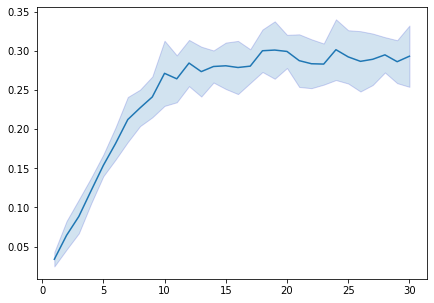

In [69]:
avg, std = rfClassifierResults(X_train, y_train)
plt.rcParams["figure.figsize"] = (7,5)
plt.plot(range(1, 31, 1), avg)
plt.fill_between(range(1, 31, 1), np.array(avg)-np.array(std), np.array(avg)+np.array(std), alpha=0.2, edgecolor='#1B2ACC')
plt.show()

In [29]:
from sklearn.ensemble import RandomForestClassifier
estrdf = RandomForestClassifier(max_depth=20, n_estimators=9, random_state=21)
estrdf.fit(X_train,y_train)
pred=estrdf.predict(X_test)
a = accuracy_score(pred, y_test)
print("Accuracy Score:")
print(a)

Accuracy Score:
0.26223776223776224


### SVC

[0.4527972027972028, 0.4178321678321678, 0.3688811188811189]


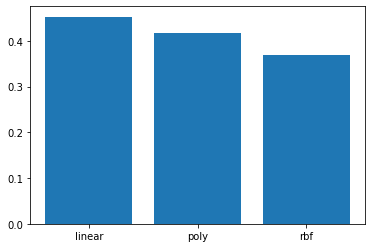

In [43]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
list_a = []
kernels = ['linear', 'poly', 'rbf']
for k in kernels:
    est = SVC(random_state=21, kernel=k)
    est.fit(X_train,y_train)
    p=est.predict(X_test)
    a = accuracy_score(p, y_test)
    list_a.append(a)
print(list_a)
plt.bar(kernels, list_a, width=0.8)
plt.show()
















----------------------------

## **PRUEBAS CON EL MODELO ELEGIDO**

In [47]:
Test_Imgs, Test_Lbls_names = read_imgs_lbls(gems_test)

Test_Lbls = get_class_index(Test_Lbls_names)

Test_Imgs = np.array(Test_Imgs).astype(np.float32)
Test_Lbls = np.array(Test_Lbls).astype(np.int32)
Test_Imgs = Test_Imgs/255
Imgs_show_test = Test_Imgs.reshape(Test_Imgs.shape[0],330,330,3)

In [72]:
from sklearn.model_selection import train_test_split
p = np.random.permutation(range(len(Imgs_show_test)))
Test_Imgs = Test_Imgs[p]
Test_Lbls = Test_Lbls[p]
X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(Test_Imgs, Test_Lbls, test_size = 0.2, random_state = 111)

In [73]:
#One hot encoding
y_train_h = tf.keras.utils.to_categorical(y_train_t)
y_test_h = tf.keras.utils.to_categorical(y_test_t)

Tipo de gema (dada por el clasificador): 
Opal
Tipo de gema: 
Opal


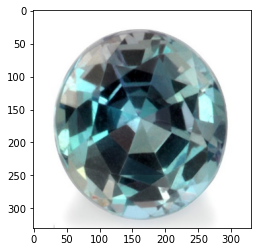

In [110]:
def gemstoneClassifier(indice):
      probs = estrdf.predict_proba(X_test_t)
      pred = np.argmax(probs, axis=1)
      gema = classes[pred[indice]]
      plt.imshow(Imgs_show_test[[indice][0]])
      print("Tipo de gema (dada por el clasificador): ")
      print(gema)
      gema_re = classes[y_test_t[indice]]
      print("Tipo de gema: ")
      print(gema_re)
        
gemstoneClassifier(1)

Tipo de gema (dada por el clasificador): 
Aventurine Green
Tipo de gema: 
Aventurine Green


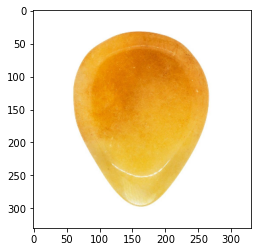

In [111]:
gemstoneClassifier(45)

Tipo de gema (dada por el clasificador): 
Rhodochrosite
Tipo de gema: 
Rhodochrosite


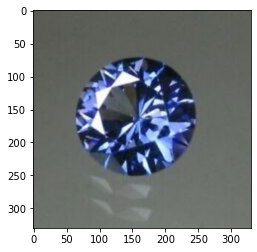

In [140]:
gemstoneClassifier(48)

Tipo de gema (dada por el clasificador): 
Morganite
Tipo de gema: 
Morganite


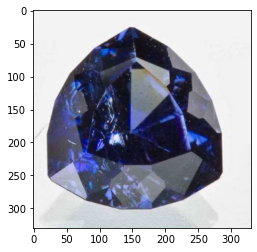

In [141]:
gemstoneClassifier(46)

Tipo de gema (dada por el clasificador): 
Onyx Red
Tipo de gema: 
Onyx Red


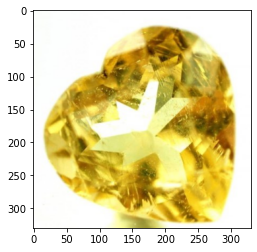

In [145]:
gemstoneClassifier(52)

Tipo de gema (dada por el clasificador): 
Carnelian
Tipo de gema: 
Carnelian


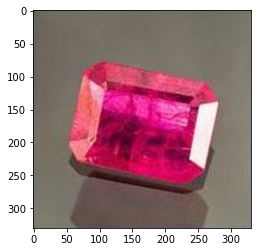

In [148]:
gemstoneClassifier(55)
















----------------------------